<a href="https://colab.research.google.com/github/ItShivani/Visualizing-COVID-19-Testing-in-India/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/datasets_557629_1261226_StatewiseTestingDetails.csv")
df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
2182,2020-06-14,West Bengal,333733.0,NaN,11087.0
2183,2020-06-15,West Bengal,343242.0,NaN,11494.0
2184,2020-06-16,West Bengal,351754.0,NaN,11909.0
2185,2020-06-17,West Bengal,360976.0,NaN,12300.0


In [ ]:
pip install geopandas

     |████████████████████████████████| 931kB 2.9MB/s 
     |████████████████████████████████| 14.7MB 302kB/s 
     |████████████████████████████████| 10.9MB 37.8MB/s 


In [ ]:
pip install descartes

In [ ]:
df['Rate'] = df['Positive']/df['TotalSamples']*100
df

,Date,State,TotalSamples,Negative,Positive,Rate
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0,0.855310
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0,1.007839
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0,1.158708
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0,0.879062
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0,0.494234
...,...,...,...,...,...,...
2182,2020-06-14,West Bengal,333733.0,NaN,11087.0,3.322117
2183,2020-06-15,West Bengal,343242.0,NaN,11494.0,3.348658
2184,2020-06-16,West Bengal,351754.0,NaN,11909.0,3.385605
2185,2020-06-17,West Bengal,360976.0,NaN,12300.0,3.407429


In [ ]:
df = df[['State','Rate']]
df

,State,Rate
0,Andaman and Nicobar Islands,0.855310
1,Andaman and Nicobar Islands,1.007839
2,Andaman and Nicobar Islands,1.158708
3,Andaman and Nicobar Islands,0.879062
4,Andaman and Nicobar Islands,0.494234
...,...,...
2182,West Bengal,3.322117
2183,West Bengal,3.348658
2184,West Bengal,3.385605
2185,West Bengal,3.407429


In [ ]:
df = df.groupby(['State']).mean()
df

,Rate
State,
Andaman and Nicobar Islands,0.477149
Andhra Pradesh,1.638874
Arunachal Pradesh,0.249360
Assam,0.867226
Bihar,2.813254
Chandigarh,6.506665
Chhattisgarh,0.659215
Dadra and Nagar Haveli and Daman and Diu,0.037721
Delhi,9.049411


In [ ]:
df = df.reset_index()

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

/bin/bash: conda: command not found


In [ ]:
#from IPython.display import display
import geopandas as gpd
fp = "/content/drive/My Drive/Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)
merged = map_df.set_index('st_nm').join(df.set_index('State'))
merged.head()

#display(in_map)

,geometry,Rate
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.867226
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2.813254
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6.506665


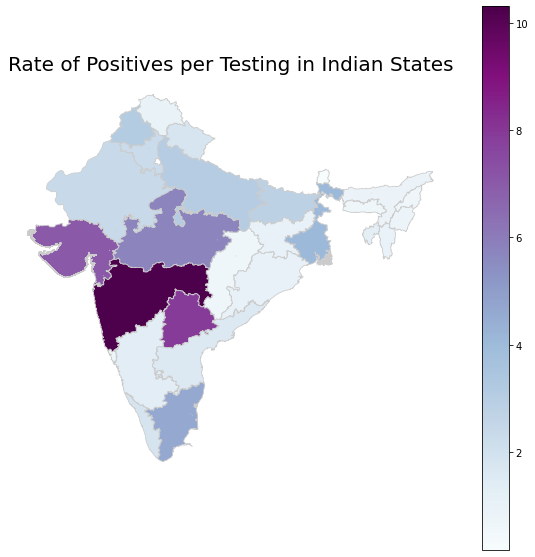

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Rate of Positives per Testing in Indian States', fontdict={'fontsize': '20', 'fontweight' : '3'})
merged.plot(column='Rate', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)